In [86]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import scipy.spatial

In [87]:
a = np.array([1,3,2.5,1.5,3,2.8,2.5,1.2,4,1,1,1,5])
b = np.array([2,4,4,2.5,5,4.5,4.5,2.5,3,3,5,2.5,6])


In [88]:
point = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

,a,b
Point,,
P1,1.0,2.0
P2,3.0,4.0
P3,2.5,4.0
P4,1.5,2.5
P5,3.0,5.0
P6,2.8,4.5
P7,2.5,4.5
P8,1.2,2.5
P9,4.0,3.0


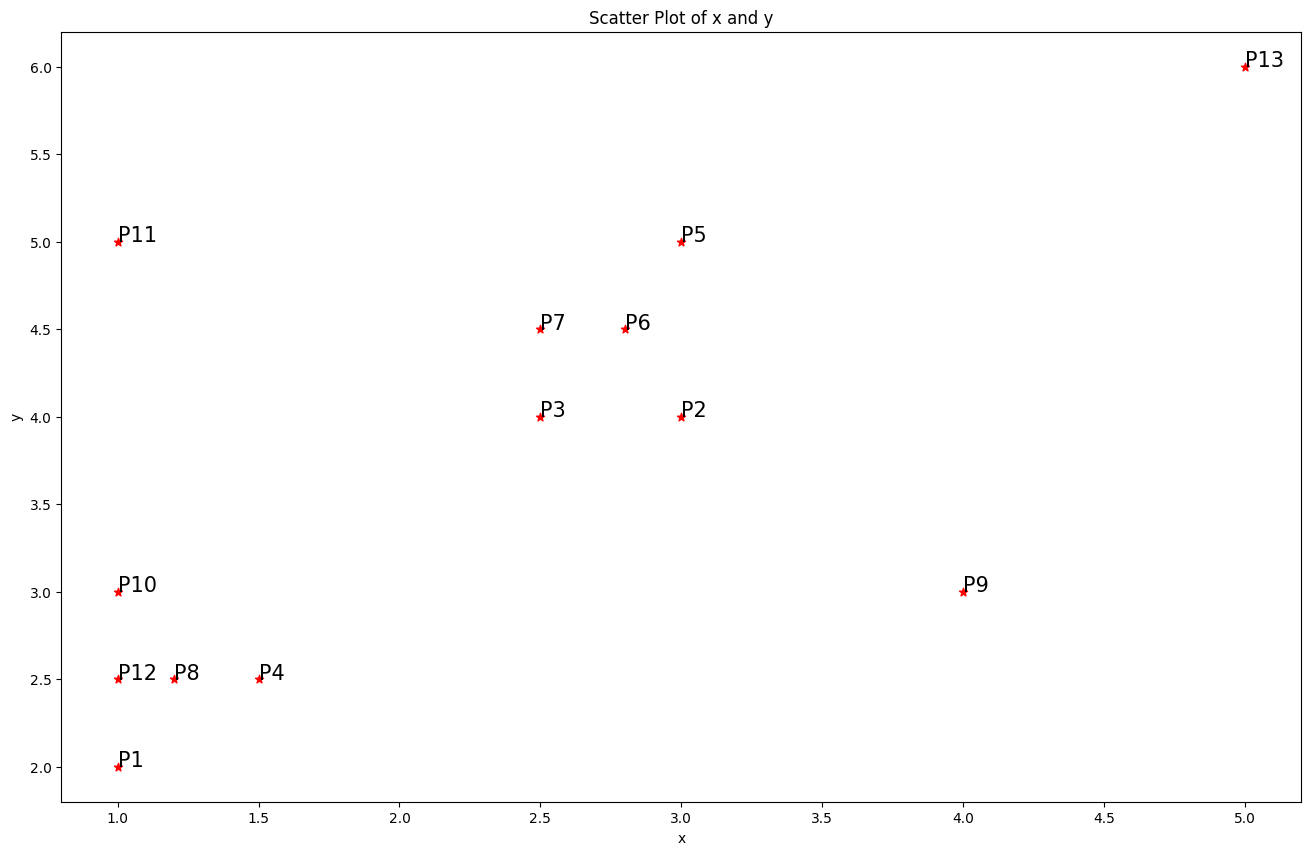

In [89]:
plt.figure(figsize=(16,10))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

In [90]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist=dist
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
P1,0.000000,2.828427,2.500000,0.707107,3.605551,3.080584,2.915476,0.538516,3.162278,1.000000,3.000000,0.500000,5.656854
P2,2.828427,0.000000,0.500000,2.121320,1.000000,0.538516,0.707107,2.343075,1.414214,2.236068,2.236068,2.500000,2.828427
P3,2.500000,0.500000,0.000000,1.802776,1.118034,0.583095,0.500000,1.984943,1.802776,1.802776,1.802776,2.121320,3.201562
P4,0.707107,2.121320,1.802776,0.000000,2.915476,2.385372,2.236068,0.300000,2.549510,0.707107,2.549510,0.500000,4.949747
P5,3.605551,1.000000,1.118034,2.915476,0.000000,0.538516,0.707107,3.080584,2.236068,2.828427,2.000000,3.201562,2.236068
P6,3.080584,0.538516,0.583095,2.385372,0.538516,0.000000,0.300000,2.561250,1.920937,2.343075,1.868154,2.690725,2.662705
P7,2.915476,0.707107,0.500000,2.236068,0.707107,0.300000,0.000000,2.385372,2.121320,2.121320,1.581139,2.500000,2.915476
P8,0.538516,2.343075,1.984943,0.300000,3.080584,2.561250,2.385372,0.000000,2.844293,0.538516,2.507987,0.200000,5.166237
P9,3.162278,1.414214,1.802776,2.549510,2.236068,1.920937,2.121320,2.844293,0.000000,3.000000,3.605551,3.041381,3.162278
P10,1.000000,2.236068,1.802776,0.707107,2.828427,2.343075,2.121320,0.538516,3.000000,0.000000,2.000000,0.500000,5.000000


Text(0, 0.5, 'Distance')

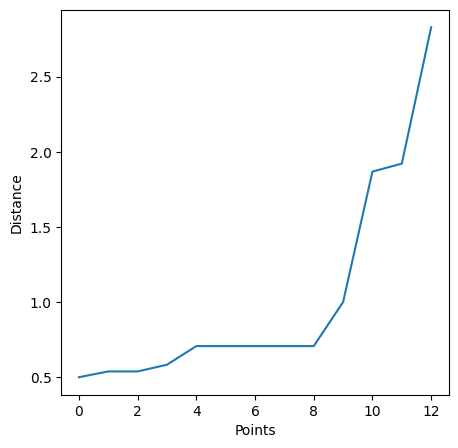

In [91]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.7071067811865476


<Figure size 500x500 with 0 Axes>

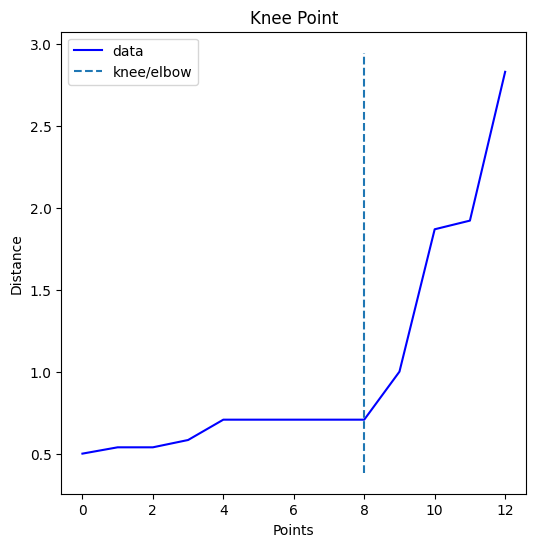

In [92]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 3
v_measure = 0.5900455745032752


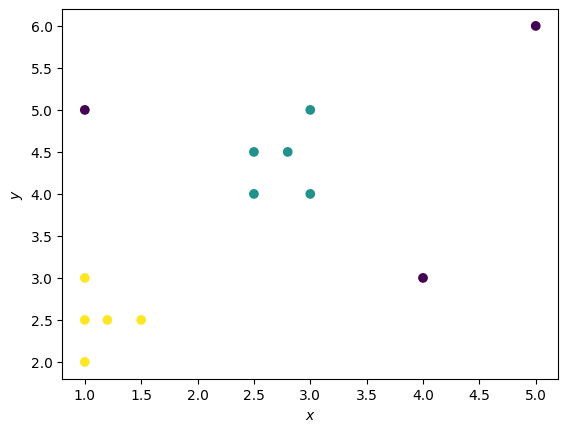

In [93]:
dbscan_cluster = DBSCAN(eps=0.70, min_samples=4)
dbscan_cluster.fit(data)

# Visualizing DBSCAN
plt.scatter(data['a'], 
data['b'], 
c=dbscan_cluster.labels_, 
label=data.index)
plt.xlabel("$x$")
plt.ylabel("$y$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(data.index, labels))